In [1]:
import numpy as np
import matplotlib.pyplot as plt
def draw_keypoints(data):
    for i in range(100):
        sample=data[i]
        img=sample['image']
        output_keypoint=sample['keypoints']
        fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 
        img = np.array(img, dtype='float32')
        img = np.transpose(img, (1, 2, 0))
        output_keypoint = output_keypoint.reshape(-1, 2) 
        axs[0].imshow(img)
        axs[1].imshow(255*np.ones(img.shape))
        for p in range(output_keypoint.shape[0]):
            axs[1].plot(output_keypoint[p, 0], output_keypoint[p, 1], 'r.')
        plt.savefig(f"../outputs/1.3/val_{i+1}.png")
        plt.close()

In [2]:
from dataset import FacialKeypointsDataset
import config
train_data=FacialKeypointsDataset(f'{config.ROOT_PATH}/training_frames_keypoints.csv',f'{config.ROOT_PATH}/training')
from utils import show_keypoint_location

tensor(1.2056) tensor(-1.4097)


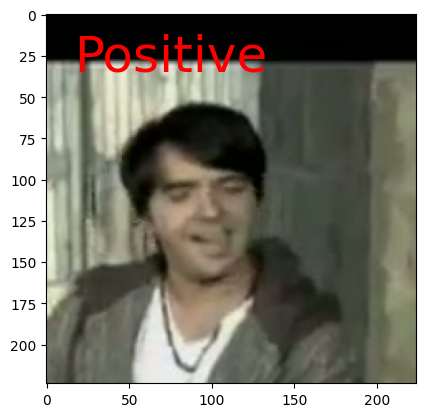

tensor(1.4881) tensor(-1.5259e-05)


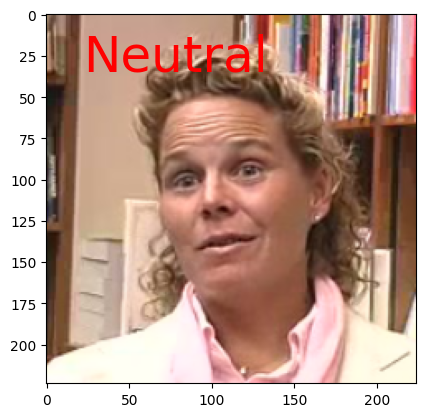

tensor(1.3421) tensor(-1.6246)


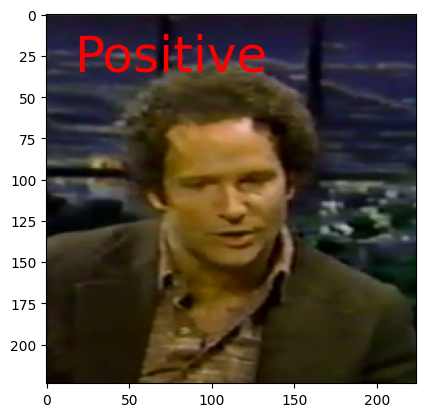

tensor(2.1710) tensor(-3.6167)


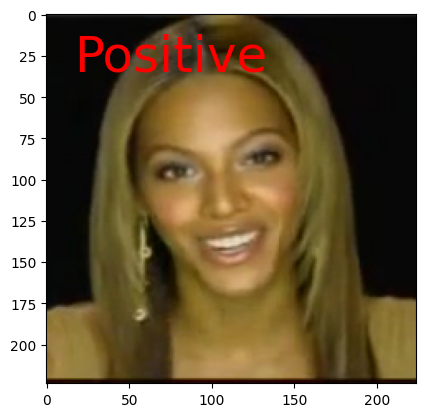

tensor(0.9593) tensor(0.1945)


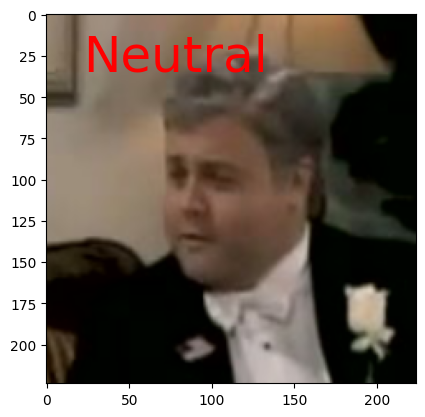

tensor(1.3750) tensor(1.5849)


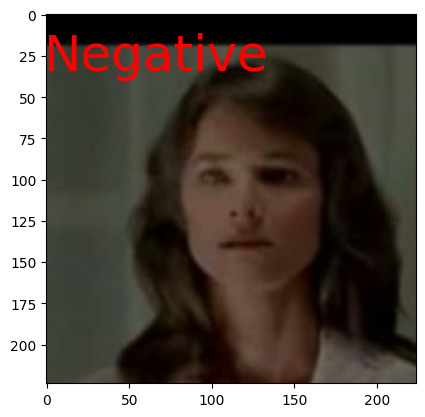

In [3]:
from utils import judge_expression_weighted
lst=[0,4,5,40,73,90]
for i in range(6):
    sample=train_data[lst[i]]
    img = sample['image']
    img = np.array(img, dtype='float32')
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    
    keypoints=sample['keypoints']
    weights=[1 if i in [48,49,59,60,53,54,55,64] else 0 for i in range(len(keypoints))]
    plt.text(0.6, 0.95, judge_expression_weighted(keypoints,weights),color='red', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes,fontsize=36)
# 显示图表
    plt.show()
plt.close()